In [1]:
import sys
sys.path.append("../src")

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = "../data/selected_train.csv"

In [4]:
selected_data = pd.read_csv(train_path, sep=",")

In [5]:
df_features_selected = selected_data[selected_data.columns.difference(['label'])]
df_labels_selected = selected_data["label"]

In [6]:
X_selected = df_features_selected.values
print(X_selected.shape)

y_selected = df_labels_selected.values
print(y_selected.shape)

(29, 56)
(29,)


In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_selected)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])

In [8]:
finalDf = pd.concat([principalDf, selected_data[['label']]], axis = 1)

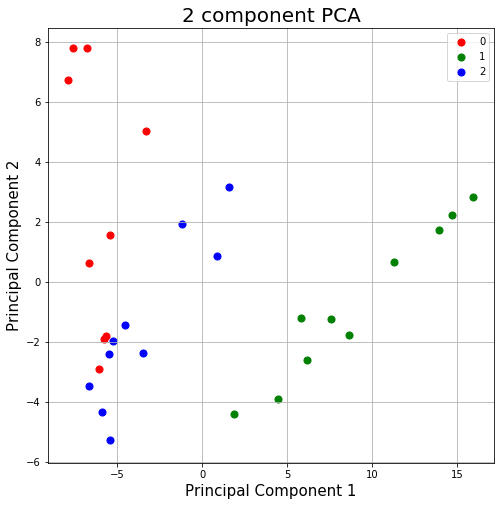

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

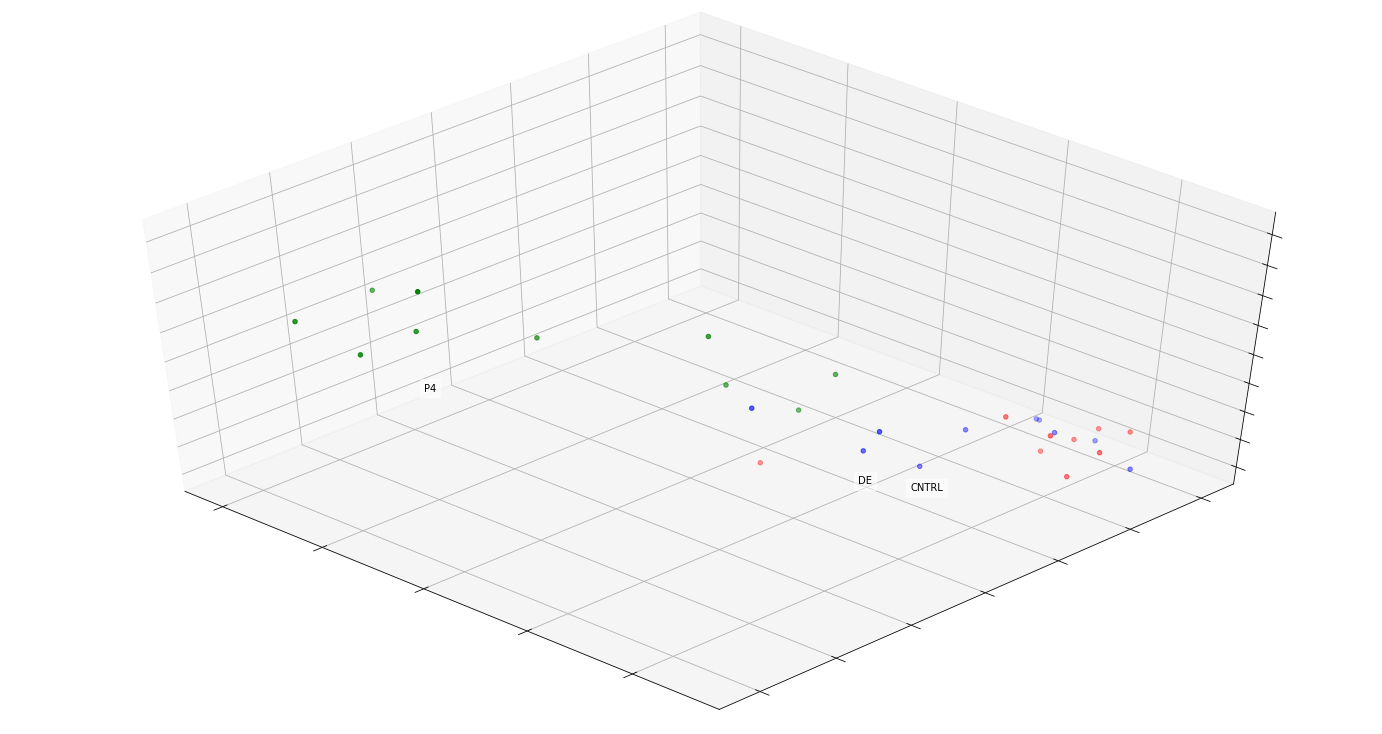

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
colors = ['r', 'g', 'b']

for name, label in [('CNTRL', 0), ('P4', 1), ('DE', 2)]:
    ax.text3D(X_selected [y_selected == label, 0].mean(),
              X_selected [y_selected == label, 1].mean() + 1.5,
              X_selected [y_selected == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y_selected, [1, 2, 0]).astype(np.float)
ax.scatter(X_selected[:, 0], X_selected[:, 1], X_selected[:, 2], c=[colors[c] for c in y_selected])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [11]:
print(pca.explained_variance_ratio_) 

[0.60376119 0.13986217]
